# P-Lesson-8: Exceptions

## Outline

* 靜態錯誤與動態錯誤
* 錯誤回溯
* 嘗試與捕捉
* 實例與真諦
* 例外體系與精確捕捉
* 例外訊息
* 善後
* 引發例外

## 靜態錯誤與動態錯誤

常見的程式錯誤有兩種:
* 靜態錯誤: `SyntaxError`
* 動態錯誤(執行期錯誤): `TypeError`, `NameError`

In [1]:
for i in range(5)
    print(i)

SyntaxError: invalid syntax (<ipython-input-1-8b1a3e699628>, line 1)

In [2]:
for i in range(5):
    print(len(i))

TypeError: object of type 'int' has no len()

## 錯誤回溯

* 當發生錯誤時，Python會產生 **回溯(traceback)**，這讓我們可以檢視錯誤發生的來源
* 有的時候一個錯誤是另外一個錯誤所引發的，唯有一層一層的檢視，才能找出錯誤。

In [3]:
def add(a, b):
    return a + b

result = add('1', 3)

TypeError: must be str, not int

## 嘗試與捕捉

我們使用 `try` 來嘗試，使用 `except` 來捕捉，使用 `finally` 來善後

In [31]:
def div_1(a, b):
    return a/b

def div_2(a, b):
    try:
        return a/b
    except:
        return 0
    finally:
        print('done')

In [32]:
div_1(8, 0)

ZeroDivisionError: division by zero

In [33]:
div_2(8, 0)

done


0

#### 想一想，為什麼使用 try/except 而非預防錯誤發生!

## 實例與真諦

讀取文字擋 `test.txt` 並將各行的兩個數字相加:

```
3 4
1 3

20 19
%%%
88 7
1 2 3
0
$$ 22
```

結果:

```
7
4
39
95
```

In [40]:
f = open('test.txt')

for line in f:
    line = line.strip()
    if not line:
        continue
    nums = line.split()
    if not len(nums) == 2:
        continue
    if not nums[0].isnumeric():
        continue
    if not nums[1].isnumeric():
        continue
    print(int(nums[0])+int(nums[1]))

f.close()

7
4
39
95


In [44]:
f = open('test.txt')

for line in f:
    try:
        a, b = line.strip().split()
        print(int(a) + int(b))
    except:
        pass

f.close()

7
4
39
95


### 真諦在此

越熟悉例外，越會覺得他威力無窮，很多很複雜、很瑣碎很難想清楚的狀況，與其利用 if/elif/else 針對每種狀況寫出處理手段以避開錯誤，不如利用 try，大膽執行程式碼，等到錯誤發生時，將之捕捉當成例外。

這種手法往往可以讓我們開發的更快，錯誤更少。畢竟，**錯誤不一定是錯誤，他可能只是個例外**。

## 例外體系與精確捕捉

* 例外體系:
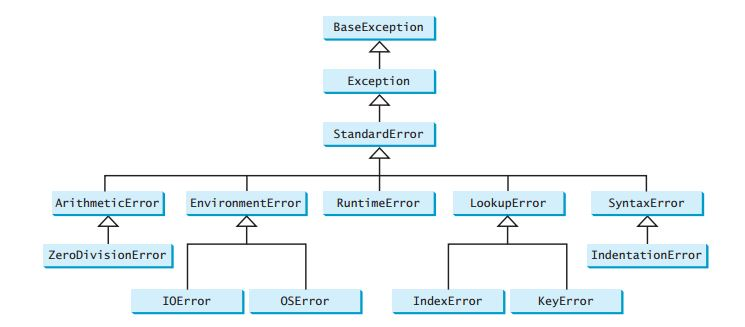

* 精確捕捉:
  * 捕捉更精確的例外
  * 縮小嘗試的範圍

In [21]:
def div_3(a, b):
    try:
        return a/b
    except ZeroDivisionError: # 在這裡我們指明了要捕捉的例外名稱
        return 0

In [19]:
div_3(8, 0)

0

In [20]:
div_3(8, '2')

TypeError: unsupported operand type(s) for /: 'int' and 'str'

#### 如果不指明精確的例外會產生什麼問題?

```python
def div_4(a, b):
    try:
        return a/b
    except Exception:
    # except:
        return 0
```